[*********************100%%**********************]  1 of 1 completed


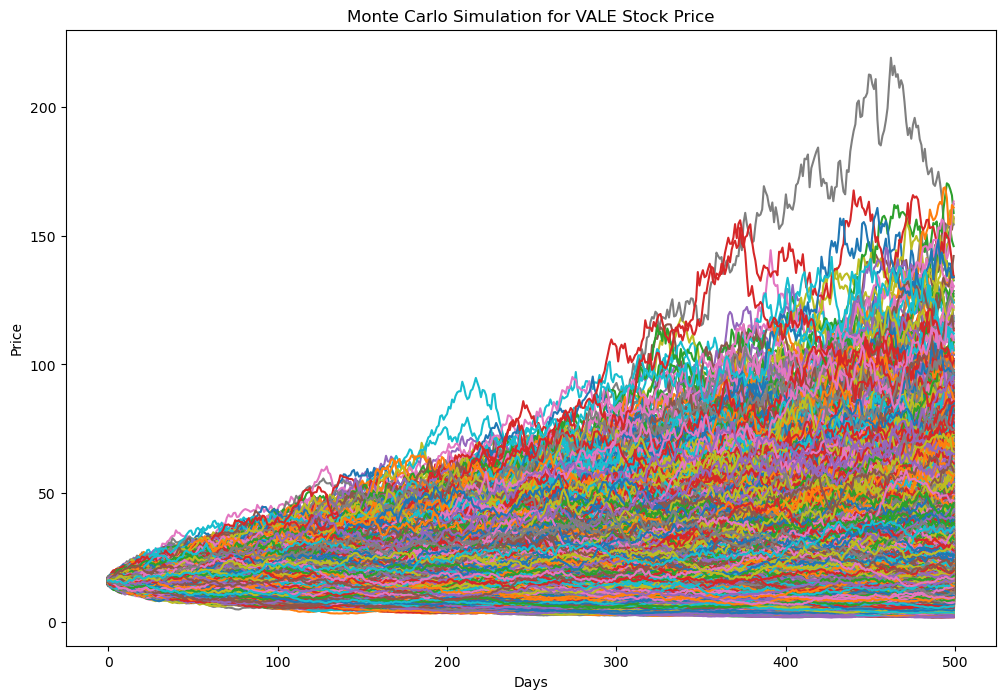

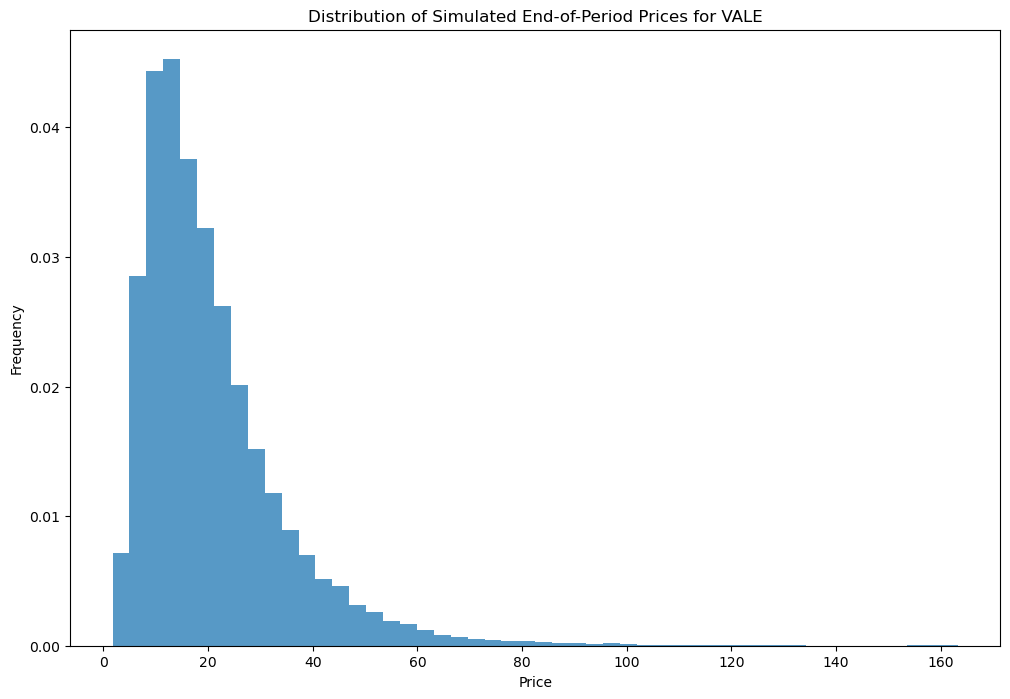

10% Confidence Interval of the Estimated Prices: 15.81 to 18.58
5% Confidence Interval of the Estimated Prices: 16.49 to 17.86
Median of the Estimated End-of-Period Prices: 17.16


In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
# Download historical data for VALE
stock_data = yf.download('VALE', start='2018-01-01', end= '2023-12-31')

# Calculate daily returns
stock_data['Returns'] = stock_data['Close'].pct_change()

# The mean and standard deviation of daily returns
mean_returns = stock_data['Returns'].mean()
std_dev_returns = stock_data['Returns'].std()

# Set the number of future trading days and simulations
num_days = 500  # Approximate trading days in a year
num_simulations = 30000

# Create an empty matrix to hold the simulation results
simulation_results = np.zeros((num_days, num_simulations))

# Fill the simulation results matrix
for i in range(num_simulations):
    # Generate random daily returns for the stock
    daily_returns = np.random.normal(mean_returns, std_dev_returns, num_days)
    # Calculate the price path
    price_series = [stock_data['Close'][-1]]
    for j in daily_returns:
        price_series.append(price_series[-1] * (1 + j))
    # Store the simulation results
    simulation_results[:, i] = price_series[1:]

# Plot the simulation results
plt.figure(figsize=(12, 8))
plt.plot(simulation_results)
plt.title('Monte Carlo Simulation for VALE Stock Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

final_prices = simulation_results[-1, :]
plt.figure(figsize=(12, 8))
plt.hist(final_prices, bins=50, alpha=0.75, density=True)
plt.title('Distribution of Simulated End-of-Period Prices for VALE')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

confidence_interval = np.percentile(final_prices, [45,55])
print(f"10% Confidence Interval of the Estimated Prices: {confidence_interval[0]:.2f} to {confidence_interval[1]:.2f}")
confidence_interval = np.percentile(final_prices, [47.5,52.5])
print(f"5% Confidence Interval of the Estimated Prices: {confidence_interval[0]:.2f} to {confidence_interval[1]:.2f}")

median_price = np.median(final_prices)
print(f"Median of the Estimated End-of-Period Prices: {median_price:.2f}")

[*********************100%%**********************]  1 of 1 completed


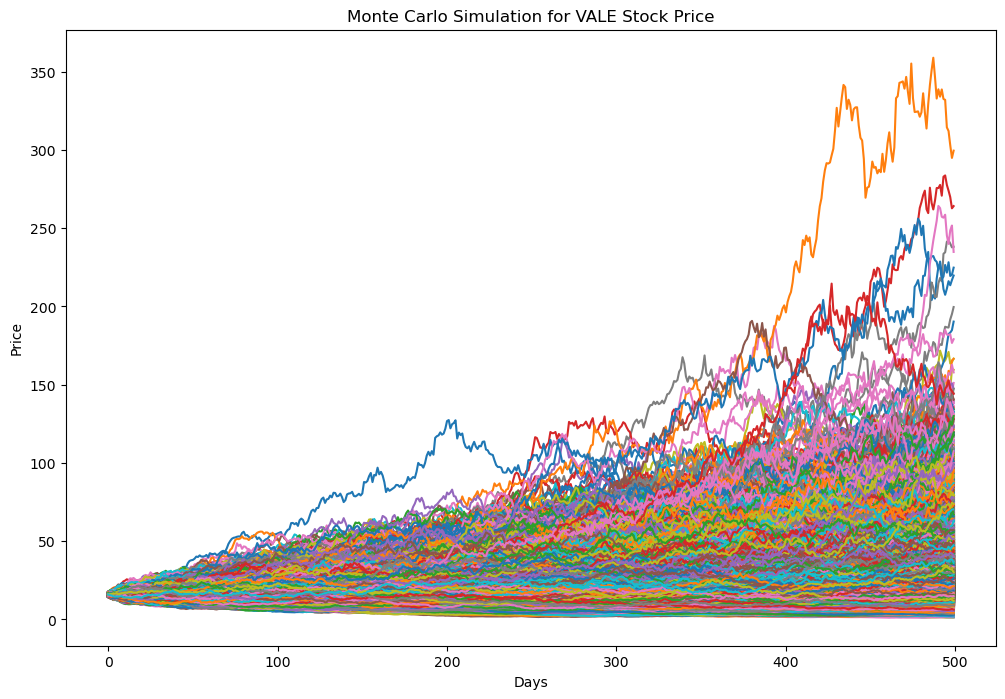

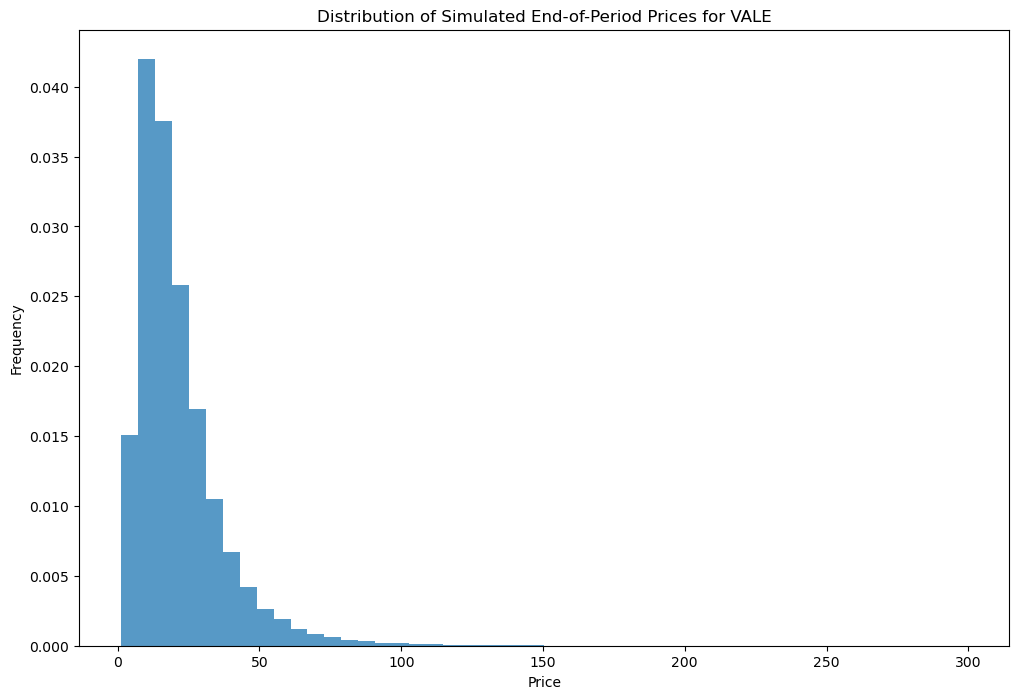

90% Confidence Interval of the Estimated Prices: 15.96 to 18.74
95% Confidence Interval of the Estimated Prices: 16.64 to 18.02
Median of the Estimated End-of-Period Prices: 17.32


In [11]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime as dt

# Format today's date
end_date = dt.today().strftime('%Y-%m-%d')
# Download historical data for VALE
stock_data = yf.download('VALE', start='2020-01-01', end='2023-12-31')

# Calculate daily returns and their log
stock_data['Returns'] = stock_data['Close'].pct_change()
stock_data['Log Returns'] = np.log(stock_data['Close'] / stock_data['Close'].shift(1))

# The mean and standard deviation of log returns
mean_log_return = stock_data['Log Returns'].mean()
std_log_return = stock_data['Log Returns'].std()

# Set the number of future trading days and simulations
num_days = 500  # Approximate trading days in a year
num_simulations = 30000

# Initialize the array to store the simulation results
simulation_results = np.zeros((num_days, num_simulations))

# Current price
current_price = stock_data['Close'][-1]

# Simulate future price paths
for i in range(num_simulations):
    random_shocks = np.random.normal(0, std_log_return, num_days)
    log_returns = mean_log_return + random_shocks
    # Uncomment below for mean reversion (requires mean_reversion_level and mean_reversion_speed)
    # log_returns += mean_reversion_speed * (mean_reversion_level - np.log(current_price)) * np.arange(1, num_days + 1)
    price_series = current_price * np.exp(np.cumsum(log_returns))
    simulation_results[:, i] = price_series

# Plot the simulation results
plt.figure(figsize=(12, 8))
plt.plot(simulation_results)
plt.title('Monte Carlo Simulation for VALE Stock Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

# Analyzing the distribution of end prices
final_prices = simulation_results[-1, :]
plt.figure(figsize=(12, 8))
plt.hist(final_prices, bins=50, alpha=0.75, density=True)
plt.title('Distribution of Simulated End-of-Period Prices for VALE')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Confidence intervals 95%
confidence_interval = np.percentile(final_prices, [45, 55])
print(f"90% Confidence Interval of the Estimated Prices: {confidence_interval[0]:.2f} to {confidence_interval[1]:.2f}")
# Confidence intervals 99%
confidence_interval = np.percentile(final_prices, [47.5, 52.5])
print(f"95% Confidence Interval of the Estimated Prices: {confidence_interval[0]:.2f} to {confidence_interval[1]:.2f}")

median_price = np.median(final_prices)
print(f"Median of the Estimated End-of-Period Prices: {median_price:.2f}")


# for 500 days (2 year prediction) ( 30000 simulations)

Model 1 : (ordinary annuity formula)

# start='2018-01-01', end='2023-12-31'
10% Confidence Interval of the Estimated Prices: 15.81 to 18.58
5% Confidence Interval of the Estimated Prices: 16.49 to 17.86
Median of the Estimated End-of-Period Prices: 17.16

# start='2020-01-01', end='2023-12-31'
10% Confidence Interval of the Estimated Prices: 15.82 to 18.66
5% Confidence Interval of the Estimated Prices: 16.49 to 17.92
Median of the Estimated End-of-Period Prices: 17.21


# start='2019-01-01', end='2023-12-31'
95% Confidence Interval of the Estimated Prices: 16.34 to 17.68
99% Confidence Interval of the Estimated Prices: 15.69 to 18.38
Median of the Estimated End-of-Period Prices: 16.98



Model 2 : ( continuous compounding model based prediction)

# start='2018-01-01', end='2023-12-31'
90% Confidence Interval of the Estimated Prices: 15.71 to 18.31
95% Confidence Interval of the Estimated Prices: 16.30 to 17.60
Median of the Estimated End-of-Period Prices: 16.94

# start='2019-01-01', end='2023-12-31'
90% Confidence Interval of the Estimated Prices: 15.64 to 18.35
95% Confidence Interval of the Estimated Prices: 16.28 to 17.63
Median of the Estimated End-of-Period Prices: 16.94

# start='2020-01-01', end='2023-12-31'
90% Confidence Interval of the Estimated Prices: 15.96 to 18.74
95% Confidence Interval of the Estimated Prices: 16.64 to 18.02
Median of the Estimated End-of-Period Prices: 17.32
